In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

df_train = pd.read_csv('trainset.txt', sep=' ')
df_test = pd.read_csv('testset.txt', sep=' ')

In [ ]:
len(df_train.columns)

544

In [ ]:
topK = 16
cc = df_train.corr()['Class']
kidx = np.argpartition(np.abs(cc), -topK)[-topK:]
cc[kidx]

Var265   -0.212385
Var264   -0.212996
Var355    0.213951
Var329    0.214098
Var319    0.214250
Var328    0.237184
Var544   -0.241957
Var327    0.257607
Var326    0.274823
Var325    0.288550
Var324    0.298841
Var323    0.304640
Var322    0.303018
Var321    0.291104
Var320    0.262235
Class     1.000000
Name: Class, dtype: float64

In [ ]:
cc = df_test.corr()['Class']
kidx = np.argpartition(np.abs(cc), -topK)[-topK:]
cc[kidx]

Var391    0.196158
Var395    0.197028
Var394    0.202221
Var325    0.248575
Var326    0.230903
Var327    0.213457
Var319    0.224652
Var392    0.202248
Var393    0.204252
Var320    0.255348
Var544   -0.261721
Var324    0.264937
Var323    0.277085
Var322    0.281276
Var321    0.274112
Class     1.000000
Name: Class, dtype: float64

In [ ]:
keras = tf.keras

tf.set_random_seed(42)

model = keras.models.Sequential([
    keras.layers.Input(shape=(len(df_train.columns) - 1)),
    keras.layers.Dense(1, activation='sigmoid',
                       kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(keras.optimizers.Adam(lr=0.0001), 'binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 544       
Total params: 544
Trainable params: 544
Non-trainable params: 0
_________________________________________________________________


In [ ]:
data_cols = list(df_train.columns)
data_cols.remove('Class')

hist = model.fit(df_train[data_cols].values, df_train['Class'].values,
                validation_data=(df_test[data_cols].values, df_test['Class'].values),
                epochs=30)


Train on 5840 samples, validate on 648 samples
Epoch 1/30
5840/5840 [==============================] - 1s 108us/sample - loss: 3.8750 - acc: 0.4471 - val_loss: 3.8252 - val_acc: 0.4630
Epoch 2/30
5840/5840 [==============================] - 0s 67us/sample - loss: 2.8856 - acc: 0.5202 - val_loss: 3.0443 - val_acc: 0.5015
Epoch 3/30
5840/5840 [==============================] - 0s 64us/sample - loss: 2.3036 - acc: 0.5519 - val_loss: 2.3945 - val_acc: 0.5123
Epoch 4/30
5840/5840 [==============================] - 0s 65us/sample - loss: 1.7954 - acc: 0.5575 - val_loss: 1.7776 - val_acc: 0.5185
Epoch 5/30
5840/5840 [==============================] - 0s 63us/sample - loss: 1.3155 - acc: 0.5560 - val_loss: 1.1926 - val_acc: 0.5170
Epoch 6/30
5840/5840 [==============================] - 0s 60us/sample - loss: 0.9363 - acc: 0.5644 - val_loss: 0.8467 - val_acc: 0.5401
Epoch 7/30
5840/5840 [==============================] - 0s 62us/sample - loss: 0.7746 - acc: 0.5863 - val_loss: 0.7762 - val_acc: 

[]

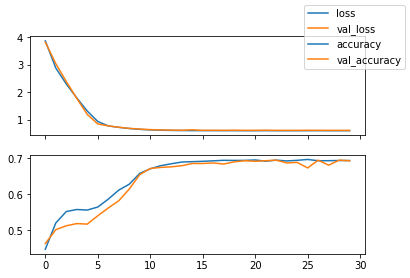

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist.history['loss'], label='loss')
axes[0].plot(hist.history['val_loss'], label='val_loss')

axes[1].plot(hist.history['acc'], label='accuracy')
axes[1].plot(hist.history['val_acc'], label='val_accuracy')

fig.legend()
plt.plot()

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred = model.predict(df_test[data_cols].values)
roc_auc_score(df_test['Class'].values, y_pred)

0.6364262794141846

In [ ]:
tf.set_random_seed(42)

model = keras.models.Sequential([
    keras.layers.Input(shape=(len(df_train.columns) - 1)),
    keras.layers.Dense(512, activation='relu',
                      kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(256, activation='linear',
                      kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(128, activation='relu',
                      kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(64, activation='linear',
                      kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(1, activation='sigmoid',
                       kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(keras.optimizers.Adam(lr=0.001), 'binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               278528    
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 451,073
Trainable params: 451,073
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(df_train[data_cols].values, df_train['Class'].values,
                validation_data=(df_test[data_cols].values, df_test['Class'].values),
                epochs=50)


y_pred = model.predict(df_test[data_cols].values)
roc_auc_score(df_test['Class'].values, y_pred)

Train on 5840 samples, validate on 648 samples
Epoch 1/50
5840/5840 [==============================] - 2s 293us/sample - loss: 6.5364 - acc: 0.5957 - val_loss: 4.3714 - val_acc: 0.6682
Epoch 2/50
5840/5840 [==============================] - 1s 222us/sample - loss: 3.9284 - acc: 0.6700 - val_loss: 3.5239 - val_acc: 0.6790
Epoch 3/50
5840/5840 [==============================] - 1s 229us/sample - loss: 3.1806 - acc: 0.6784 - val_loss: 2.8719 - val_acc: 0.6713
Epoch 4/50
5840/5840 [==============================] - 1s 228us/sample - loss: 2.5947 - acc: 0.6776 - val_loss: 2.3693 - val_acc: 0.6821
Epoch 5/50
5840/5840 [==============================] - 1s 230us/sample - loss: 2.1464 - acc: 0.6795 - val_loss: 1.9642 - val_acc: 0.6759
Epoch 6/50
5840/5840 [==============================] - 1s 222us/sample - loss: 1.8018 - acc: 0.6815 - val_loss: 1.6606 - val_acc: 0.6821
Epoch 7/50
5840/5840 [==============================] - 1s 225us/sample - loss: 1.5308 - acc: 0.6788 - val_loss: 1.4257 - val

0.6258844824749054

[]

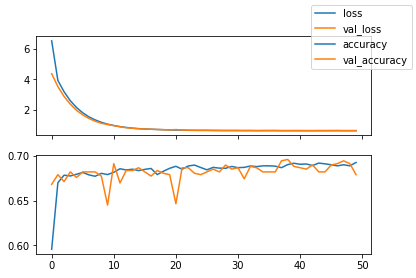

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist.history['loss'], label='loss')
axes[0].plot(hist.history['val_loss'], label='val_loss')

axes[1].plot(hist.history['acc'], label='accuracy')
axes[1].plot(hist.history['val_acc'], label='val_accuracy')

fig.legend()
plt.plot()

In [ ]:
import tensorflow.keras.backend as K

def make_model():
  inp = keras.layers.Input(shape=(len(df_train.columns) - 1))
  a = keras.layers.Dense(64)(inp)
  b = keras.layers.Dense(64)(inp)
  ab = keras.layers.Multiply()([a, b])
  ab_s = keras.layers.Activation('softmax')(ab)
  x = keras.layers.Dense(64)(inp)
  p = keras.layers.Multiply()([ab_s, x])
  h1 = keras.layers.Dense(16, activation='relu')(p)
  out = keras.layers.Dense(1, activation='sigmoid')(h1)
  model = keras.models.Model(inp, out)
  model.compile(keras.optimizers.Adam(lr=0.001),
                'binary_crossentropy', metrics=['acc'])
  return model

tf.set_random_seed(42)
model = make_model()
model.summary()


Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 543)]        0                                            
__________________________________________________________________________________________________
dense_65 (Dense)                (None, 64)           34816       input_23[0][0]                   
__________________________________________________________________________________________________
dense_66 (Dense)                (None, 64)           34816       input_23[0][0]                   
__________________________________________________________________________________________________
multiply_2 (Multiply)           (None, 64)           0           dense_65[0][0]                   
                                                                 dense_66[0][0]             

In [ ]:
hist = model.fit(df_train[data_cols].values, df_train['Class'].values,
                validation_data=(df_test[data_cols].values, df_test['Class'].values),
                epochs=50)


y_pred = model.predict(df_test[data_cols].values)
roc_auc_score(df_test['Class'].values, y_pred)

Train on 5840 samples, validate on 648 samples
Epoch 1/50
5840/5840 [==============================] - 1s 188us/sample - loss: 0.6686 - acc: 0.6322 - val_loss: 0.6550 - val_acc: 0.6620
Epoch 2/50
5840/5840 [==============================] - 1s 106us/sample - loss: 0.6387 - acc: 0.6610 - val_loss: 0.6270 - val_acc: 0.6775
Epoch 3/50
5840/5840 [==============================] - 1s 109us/sample - loss: 0.6142 - acc: 0.6810 - val_loss: 0.6225 - val_acc: 0.6852
Epoch 4/50
5840/5840 [==============================] - 1s 107us/sample - loss: 0.6081 - acc: 0.6884 - val_loss: 0.6169 - val_acc: 0.6790
Epoch 5/50
5840/5840 [==============================] - 1s 105us/sample - loss: 0.6058 - acc: 0.6884 - val_loss: 0.6101 - val_acc: 0.6898
Epoch 6/50
5840/5840 [==============================] - 1s 101us/sample - loss: 0.6046 - acc: 0.6899 - val_loss: 0.6175 - val_acc: 0.6790
Epoch 7/50
5840/5840 [==============================] - 1s 101us/sample - loss: 0.6049 - acc: 0.6880 - val_loss: 0.6082 - val

0.6335979924304755

In [ ]:
import lightgbm as lgb

train_data = lgb.Dataset(df_train[data_cols].values, label=df_train['Class'])
eval_data = lgb.Dataset(df_test[data_cols].values, label=df_test['Class'])

param = {
    'num_leaves': 31,
    'objective': 'binary',
    'metric': 'auc',
}

bst = lgb.train(param, train_data, 500, valid_sets=[eval_data],
                early_stopping_rounds=5)
bst.save_model('model.txt', num_iteration=bst.best_iteration)

[1]	valid_0's auc: 0.724731
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.737
[3]	valid_0's auc: 0.741181
[4]	valid_0's auc: 0.747295
[5]	valid_0's auc: 0.749583
[6]	valid_0's auc: 0.752725
[7]	valid_0's auc: 0.75723
[8]	valid_0's auc: 0.754782
[9]	valid_0's auc: 0.758778
[10]	valid_0's auc: 0.760547
[11]	valid_0's auc: 0.760727
[12]	valid_0's auc: 0.759133
[13]	valid_0's auc: 0.758932
[14]	valid_0's auc: 0.762912
[15]	valid_0's auc: 0.764424
[16]	valid_0's auc: 0.770297
[17]	valid_0's auc: 0.773105
[18]	valid_0's auc: 0.776673
[19]	valid_0's auc: 0.777424
[20]	valid_0's auc: 0.777697
[21]	valid_0's auc: 0.782057
[22]	valid_0's auc: 0.782448
[23]	valid_0's auc: 0.783281
[24]	valid_0's auc: 0.783086
[25]	valid_0's auc: 0.783693
[26]	valid_0's auc: 0.783333
[27]	valid_0's auc: 0.784042
[28]	valid_0's auc: 0.784413
[29]	valid_0's auc: 0.785822
[30]	valid_0's auc: 0.785822
[31]	valid_0's auc: 0.786469
[32]	valid_0's auc: 0.784752
[33]	valid_0's auc: 0.78

In [ ]:
y_pred = bst.predict(df_test[data_cols].values)
roc_auc_score(df_test['Class'].values, y_pred)

0.7864694750699358

In [ ]:
!pip install -U git+https://github.com/pedro-r-marques/keras-opt

  Cloning https://github.com/pedro-r-marques/keras-opt to /tmp/pip-req-build-gy2fky6l
  Running command git clone -q https://github.com/pedro-r-marques/keras-opt /tmp/pip-req-build-gy2fky6l
  Stored in directory: /tmp/pip-ephem-wheel-cache-9u472ckt/wheels/d4/18/de/5cd090c5023561c52cd3d35efd0b2fd4de9010330ae7b295c5
Successfully built keras-opt
  Found existing installation: keras-opt 0.0.1
    Uninstalling keras-opt-0.0.1:
      Successfully uninstalled keras-opt-0.0.1


In [ ]:
keras = tf.keras

tf.set_random_seed(42)

model = keras.models.Sequential([
    keras.layers.Input(shape=(len(df_train.columns) - 1)),
    keras.layers.Dense(64, activation='linear',
                       kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(48, activation='relu',
                       kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(32, activation='sigmoid',
                       kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid',
                       kernel_regularizer=keras.regularizers.l2(0.001))
])

model.compile(keras.optimizers.Adam(lr=0.0001), 'binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                34816     
_________________________________________________________________
dense_9 (Dense)              (None, 48)                3120      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1568      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 39,537
Trainable params: 39,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# hist = model.fit(df_train[data_cols].values, df_train['Class'].values,
#                 validation_data=(df_test[data_cols].values, df_test['Class'].values),
#                 epochs=50, verbose=False)


# y_pred = model.predict(df_test[data_cols].values)
# print(hist.history['loss'][-1], hist.history['acc'][-1])
# print(hist.history['val_loss'][-1], hist.history['val_acc'][-1])
# roc_auc_score(df_test['Class'].values, y_pred)

In [ ]:
from keras_opt.scipy_optimizer import GradientObserver, ScipyOptimizer

model.compile(optimizer=GradientObserver(),
              loss='binary_crossentropy', metrics=['acc'])

opt = ScipyOptimizer(model)


In [ ]:
data_cols = list(df_train.columns)
data_cols.remove('Class')

result, hist = opt.fit(
    df_train[data_cols].values, df_train['Class'].values,
    validation_data=(df_test[data_cols].values, df_test['Class'].values),
    epochs=1000, verbose=False)



In [ ]:
from sklearn.metrics import roc_auc_score

print(result)

y_pred = model.predict(df_test[data_cols].values)
print(hist.history['loss'][-1], hist.history['acc'][-1])
print(hist.history['val_loss'][-1], hist.history['val_acc'][-1])
roc_auc_score(df_test['Class'].values, y_pred)

     fun: 0.7079229354858398
     jac: array([ 1.01360847e-05,  4.79942537e-05,  9.59809913e-05, ...,
       -7.87499477e-04,  5.24362724e-04,  1.09598514e-04])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 1788
     nit: 1000
    njev: 1788
  status: 1
 success: False
       x: array([ 0.00507845,  0.02399812,  0.04799348, ...,  0.17585444,
       -0.27212561, -0.10263521])
0.70792294 0.7087329
0.7233912944793701 0.6959876418113708


0.6679179693927926

[]

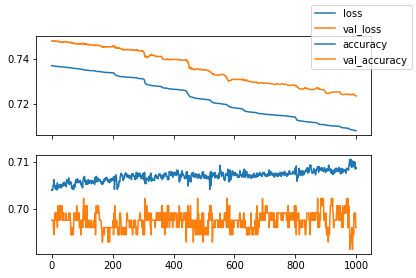

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist.history['loss'], label='loss')
axes[0].plot(hist.history['val_loss'], label='val_loss')

axes[1].plot(hist.history['acc'], label='accuracy')
axes[1].plot(hist.history['val_acc'], label='val_accuracy')

fig.legend()
plt.plot()

In [ ]:
import tensorflow.keras.backend as K

class Selector(keras.layers.Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(Selector, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.kernel = self.add_weight(name='kernel',
                                      shape=(int(input_shape[1]), self.output_dim),
                                      initializer='uniform',
                                      trainable=True)
        super(Selector, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):
        act = K.softmax(K.transpose(self.kernel))
        return tf.matmul(x, act, transpose_b=True)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

def make_model():
  inp = keras.layers.Input(shape=(len(df_train.columns) - 1,))
  r = keras.layers.Reshape((len(df_train.columns) - 1, 1,))(inp)
  v = keras.layers.LocallyConnected1D(10, 1)(r)
  v = keras.layers.Flatten()(v)
  q = Selector(32)(v)
  out = keras.layers.Dense(1, activation='sigmoid')(q)
  model = keras.models.Model(inp, out)
  model.compile(keras.optimizers.Adam(lr=0.001),
                'binary_crossentropy', metrics=['acc'])
  return model

tf.set_random_seed(42)
model = make_model()
model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 543)]             0         
_________________________________________________________________
reshape_8 (Reshape)          (None, 543, 1)            0         
_________________________________________________________________
locally_connected1d_7 (Local (None, 543, 10)           10860     
_________________________________________________________________
flatten_5 (Flatten)          (None, 5430)              0         
_________________________________________________________________
selector_5 (Selector)        (None, 32)                173760    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 184,653
Trainable params: 184,653
Non-trainable params: 0
_______________________________________________________

In [ ]:
hist = model.fit(df_train[data_cols].values, df_train['Class'].values,
                validation_data=(df_test[data_cols].values, df_test['Class'].values),
                epochs=30)


y_pred = model.predict(df_test[data_cols].values)
roc_auc_score(df_test['Class'].values, y_pred)

Train on 5840 samples, validate on 648 samples
Epoch 1/30
5840/5840 [==============================] - 6s 1ms/sample - loss: 0.6661 - acc: 0.6336 - val_loss: 0.6536 - val_acc: 0.6358
Epoch 2/30
5840/5840 [==============================] - 2s 387us/sample - loss: 0.6475 - acc: 0.6348 - val_loss: 0.6379 - val_acc: 0.6358
Epoch 3/30
5840/5840 [==============================] - 2s 363us/sample - loss: 0.6322 - acc: 0.6707 - val_loss: 0.6262 - val_acc: 0.6728
Epoch 4/30
5840/5840 [==============================] - 2s 366us/sample - loss: 0.6221 - acc: 0.6906 - val_loss: 0.6176 - val_acc: 0.6944
Epoch 5/30
5840/5840 [==============================] - 2s 385us/sample - loss: 0.6157 - acc: 0.6892 - val_loss: 0.6131 - val_acc: 0.6929
Epoch 6/30
5840/5840 [==============================] - 2s 379us/sample - loss: 0.6115 - acc: 0.6921 - val_loss: 0.6121 - val_acc: 0.6883
Epoch 7/30
5840/5840 [==============================] - 2s 353us/sample - loss: 0.6093 - acc: 0.6901 - val_loss: 0.6130 - val_a

0.6288773243376666